<a href="https://colab.research.google.com/github/leoafs/DIP/blob/main/Projeto/Real_ESRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 377, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 377 (delta 198), reused 269 (delta 103), pack-reused 0
Receiving objects: 100% (377/377), 3.20 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (198/198), done.
/content/Real-ESRGAN
     |████████████████████████████████| 147 kB 5.3 MB/s 
     |████████████████████████████████| 5.8 MB 18.9 MB/s 
     |████████████████████████████████| 185 kB 45.8 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.4.2-py3-none-any.whl size=182171 sha256=8e92e5602ffde535c5479db98bbe2879b265e24f1e1006bfddadf320a2b379f7
  Stored in directory: /root/.cache/pip/wheels/96/be/05/7e5677c7d34ee56a2a1e2f05e1ce26a0bf358c1e2fb5ee46c8
Successfully built basicsr
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 177 kB 42.5 MB/s 
  Created wheel for facexlib: filename=facexlib-0.2.1.0-py3

# 2. Imagens



In [2]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)

os.mkdir(upload_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving IMG_20210605_213537.jpg to IMG_20210605_213537.jpg
move IMG_20210605_213537.jpg to upload/IMG_20210605_213537.jpg


# 3. Inference


In [3]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
# Arguments
# --model_path: the path to the pretrained model
# --input: input folder or image
# --netscale: The scale factor in the network architecture. It should be consistent with the model
# --outscale: Output scale, can be arbitrary scale factore. 

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 102MB/s] 
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANCleanv1-NoCE-C2.pth

100% 332M/332M [00:03<00:00, 88.9MB/s]
Testing 0 IMG_20210605_213537
inference_realesrgan.py:84: UserWarning: The input image is large, try X2 model for better performace.
  warnings.warn('The input image is large, try X2 model for better performace.')
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  retur

# 4. Visualization

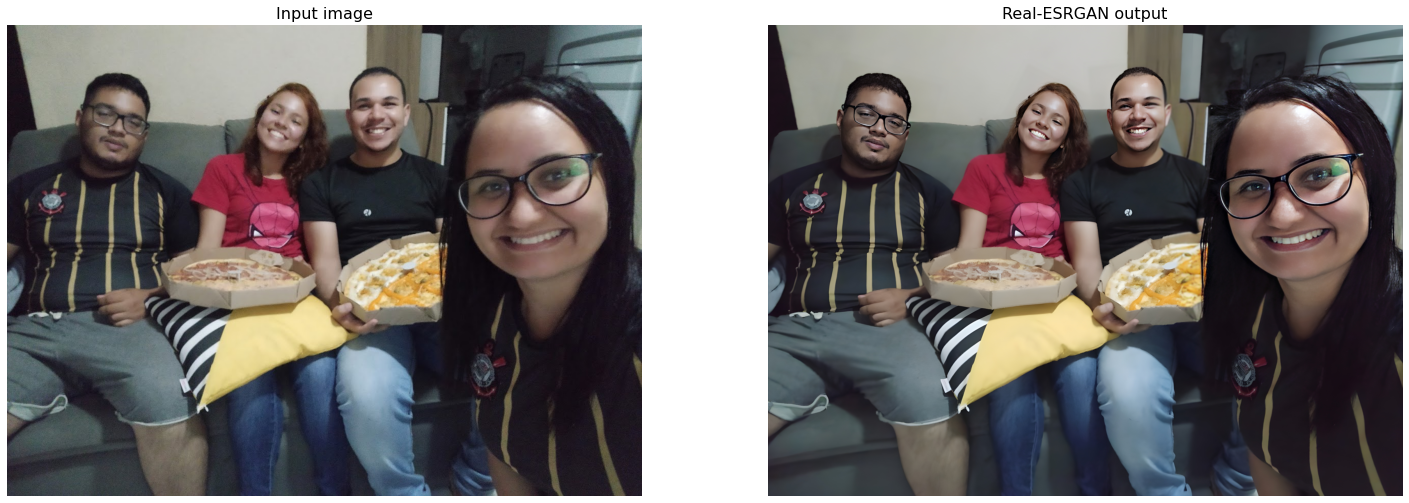

In [4]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>